## Kaggle API
- Kaggle API는 Kaggle 홈페이지 Account -  다운로드 받는다. 
- 패키지를 설치한다. 

In [ ]:
!pip install kaggle

- 해당 코드에서 kaggle.json 파일을 불러온다. 
- 윈도우, Mac, Linux에서 직접 데이터를 불러오고자 할 때는 해당 공식 문서를 확인한다. 
  + https://github.com/Kaggle/kaggle-api


In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
      print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 64 bytes


## 데이터 다운로드 및 불러오기
- 현재 진행중인 대회 목록을 불러 온다.


In [ ]:
!kaggle competitions list

ref                                                  deadline             category            reward  teamCount  userHasEntered  
---------------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
contradictory-my-dear-watson                         2030-07-01 23:59:00  Getting Started     Prizes        225           False  
gan-getting-started                                  2030-07-01 23:59:00  Getting Started     Prizes        382           False  
tpu-getting-started                                  2030-06-03 23:59:00  Getting Started  Knowledge       1023           False  
digit-recognizer                                     2030-01-01 00:00:00  Getting Started  Knowledge       6625           False  
titanic                                              2030-01-01 00:00:00  Getting Started  Knowledge      56346            True  
house-prices-advanced-regression-techniques          2030-01-01 00:00:00  Getting Started 

- 데이터를 kaggle 명령어를 통해 불러오는 코드다. 
  + https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data


In [ ]:
# 직접 데이터를 내려 받도록 합니다. 


data_description.txt: Skipping, found more recently modified local copy (use --force to force download)
sample_submission.csv: Skipping, found more recently modified local copy (use --force to force download)
test.csv: Skipping, found more recently modified local copy (use --force to force download)
train.csv: Skipping, found more recently modified local copy (use --force to force download)


- 데이터를 불러온다. 

In [ ]:
# 빈칸 입력을 해보세요
import 

train = 
test = 

print('Data Loading is done!')

Data Loading is done!


## 데이터 둘러보기 

In [ ]:
print("The shape of Train Data is:", train.shape)
print("The shape of Test Data is:", test.shape)

The shape of Train Data is: (1460, 81)
The shape of Test Data is: (1459, 80)


- 해당 코드를 실행하여 결측치 값을 확인한다. 

In [ ]:
# 데이터의 정보 파악 하는 코드를 작성합니다. info
print(train.입력하세요)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
print(test.입력하세요)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

## Feature Engineering
- 데이터 전처리 및 Feature Engineering을 수행하는 코드를 작성한다. 

### 이상치 제거
- 먼저 이상치를 제거한다. 
- 전체적인 집의 Quality는 떨어지는 데 가격이 높다는 것은 가격을 잘못 기입했을 거라는 가정하여 제거한다. 
- 행 또는 열을 제거할 때는 drop 메서드를 사용한다. 
  + 참조: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html

In [ ]:
# 이상치가 있는 행 코드를 조회한다.  
# 조건식은 OverallQual 4 미만인데, SalePrice는 100000 초과인 주택을 말합니다. 


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
74,75,50,RM,60.0,5790,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,107400
323,324,20,RM,49.0,5820,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,126175
449,450,50,RM,50.0,6000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,120000
1045,1046,20,RL,NaN,13680,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,139600
1404,1405,50,RL,60.0,10410,Pave,Grvl,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,1,2006,WD,Family,105000


In [ ]:
# 위 데이터를 제거한다. (drop 함수 사용)
train.drop()
train.reset_index(drop=True, inplace=True)
print(train.shape)

(1455, 81)


### 종속변수의 로그 변환
- 비대칭 데이터를 처리할 때, 로그변환을 적용한다.
- 종속변수 로그변환을 적용하여 통계 모형 가정을 충족시키기 위한 것을 적용한다. (예: 선형회귀)
- 첫번째 그래프는 비대칭 그래프를 구현했다. 

The value of mu before log transformation is: 181131.80137457044
The value of sigma before log transformation is: 79466.69935176395


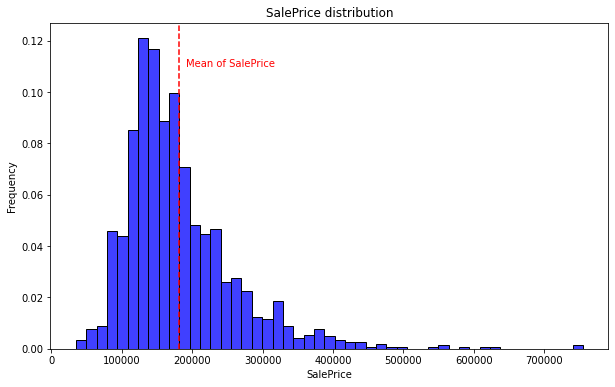

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

(mu, sigma) = norm.fit(train['SalePrice'])
print("The value of mu before log transformation is:", mu)
print("The value of sigma before log transformation is:", sigma)

# 막대 그래프 시각화 코드를 직접 작성하십시요.

plt.axvline(mu, color='r', linestyle='--')
plt.text(mu + 10000, 0.11, 'Mean of SalePrice', rotation=0, color='r')
plt.show()

- 이번에는 로그변환 후의 시각화 코드를 확인한다. 

The value of mu before log transformation is: 12.025216848544066
The value of sigma before log transformation is: 0.3994595223123619


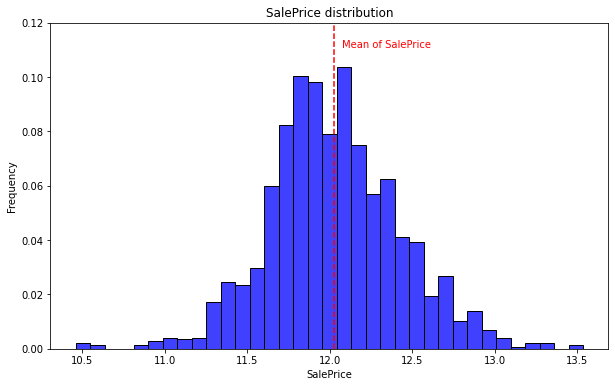

In [ ]:
import numpy as np 

train["SalePrice"] = np.log1p(train["SalePrice"])

(mu, sigma) = norm.fit(train['SalePrice'])
print("The value of mu before log transformation is:", mu)
print("The value of sigma before log transformation is:", sigma)

# 막대 그래프 시각화 코드를 직접 작성하십시요.


plt.axvline(mu, color='r', linestyle='--')
plt.text(mu + 0.05, 0.111, 'Mean of SalePrice', rotation=0, color='r')
plt.ylim(0, 0.12)
plt.show()

### 데이터 ID 값 제거
- ID값을 제거한다.

In [ ]:
train_ID = train['Id']
test_ID = test['Id']

# Id 컬럼을 제거한다. 
train.
test.
train.shape, test.shape

((1455, 80), (1459, 79))

### Y값 추출
- 이번에는 Y값에 해당하는 SalePrice를 추출한다. 

In [ ]:
# y값만 별도로 저장한다. 
y = train['SalePrice'].reset_index(drop=True)

# 데이터 전처리를 위해 SalePrice를 제거하는 코드를 작성합니다.

train.shape, test.shape, y.shape

((1455, 79), (1459, 79), (1455,))

### 데이터 합치기
- 이번엔 데이터를 합친다. 
- 단, 이 방법은 추천하지 않는다. 
  + Data Leakage 용어를 이해할 필요가 있다. 
- train 데이터와 test 데이터는 별개의 데이터 셋이다. 원칙은 각각 별개로 처리하는 것을 추천한다. 

In [ ]:
# 데이터를 합치는 코드를 작성합니다. 
# pd.concat을 사용합니다. 
all_df = 
all_df.shape

(2914, 79)

### 결측치 확인
- 결측치의 비율을 확인하는 함수를 만들었다. 
- 결측치를 확인한 뒤 어떤 변수들을 삭제할 것인지 정하기 위해 결괏값을 출력했다. 

In [ ]:
# 결측치 코드는 시간 되실 때, 하나씩 하나씩 작성합니다. 
def check_na(data, head_num = 6):
  isnull_na = (data.isnull().sum() / len(data)) * 100
  data_na = isnull_na.drop(isnull_na[isnull_na == 0].index).sort_values(ascending=False)
  missing_data = pd.DataFrame({'Missing Ratio' :data_na, 
                               'Data Type': data.dtypes[data_na.index]})
  print("결측치 데이터 컬럼과 건수:\n", missing_data.head(head_num))

check_na(all_df, 20)

결측치 데이터 컬럼과 건수:
               Missing Ratio Data Type
PoolQC            99.656829    object
MiscFeature       96.396706    object
Alley             93.239533    object
Fence             80.439259    object
FireplaceQu       48.592999    object
LotFrontage       16.643789   float64
GarageFinish       5.456417    object
GarageQual         5.456417    object
GarageCond         5.456417    object
GarageYrBlt        5.456417   float64
GarageType         5.387783    object
BsmtExposure       2.779684    object
BsmtCond           2.779684    object
BsmtQual           2.745367    object
BsmtFinType2       2.711050    object
BsmtFinType1       2.676733    object
MasVnrType         0.823610    object
MasVnrArea         0.789293   float64
MSZoning           0.137268    object
BsmtFullBath       0.068634   float64


### 결측치 제거
- 결측치 비율이 높은 변수들은 모두 제거하기로 했다. 


In [ ]:
# 'PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage' 변수 제거
all_df
check_na(all_df)

결측치 데이터 컬럼과 건수:
               Missing Ratio Data Type
GarageCond         5.456417    object
GarageQual         5.456417    object
GarageYrBlt        5.456417   float64
GarageFinish       5.456417    object
GarageType         5.387783    object
BsmtCond           2.779684    object


### 결측치 채우기
- 결측치를 채우는 방법은 매우 다양하다. 
- 그러나, 이번에는 문자열 데이터는 가장 빈도가 높은 데이터 순을 대치하는 방법을 적용했다. 


In [ ]:
print(all_df['BsmtCond'].value_counts())
print()
print(all_df['BsmtCond'].mode()[0])

TA    2602
Gd     122
Fa     104
Po       5
Name: BsmtCond, dtype: int64

TA


- 코드 설명은 주석을 참조 합니다. 
- 중간에 code 작성 영역을 채워주시면 됩니다. 

In [ ]:
import numpy as np

# 문자열 데이터만 추출
# numpy를 활용합니다. 
cat_all_vars = train.select_dtypes(exclude=code) 
print("The whole number of all_vars", len(list(cat_all_vars)))

# 문자열 데이터 중에서 이미 기 삭제했던 Feature들이 있었기 때문에, 
# 한번 더 Feature를 정리하는 코드를 작성한다. 
# 따라서 38개의 Feature만 추출했다. 
code
for v in cat_all_vars:
    if v not in ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu']:
        code.append(v)

print("The whole number of final_cat_vars", len(code))

# 이제 각 Feature 마다 빈도수가 가장 많이 나타나는 값을 추가하는 코드를 작성한다. 
for i in code:
  all_df[i] = all_df[i].code(all_df[i].mode()[0])

# 이제 수치형 데이터만 남은 것을 확인한다. 
check_na(all_df, 20)

The whole number of all_vars 43
The whole number of final_cat_vars 38
결측치 데이터 컬럼과 건수:
               Missing Ratio Data Type
GarageYrBlt        5.456417   float64
MasVnrArea         0.789293   float64
BsmtFullBath       0.068634   float64
BsmtHalfBath       0.068634   float64
BsmtFinSF1         0.034317   float64
BsmtFinSF2         0.034317   float64
BsmtUnfSF          0.034317   float64
TotalBsmtSF        0.034317   float64
GarageCars         0.034317   float64
GarageArea         0.034317   float64


In [ ]:
import numpy as np

# 방법은 기존과 동일하다. 
# 이번에는 수치형 데이터만 추출한다. 
num_all_vars = list(train.select_dtypes(include=code))
print("The whole number of all_vars", len(num_all_vars))

# 수치형 데이터 중, 결측치가 많았던 `LotFrontage`만 처리한다. 
num_all_vars.code('LotFrontage')
print("The whole number of final_cat_vars", len(num_all_vars))

# 이번에는 수치형 데이터의 평균이 아닌 중간값을 지정했다. 
for i in num_all_vars:
  all_df[i].code(value=all_df[i].median(), inplace=True)

check_na(all_df, 20)

The whole number of all_vars 36
The whole number of final_cat_vars 35
결측치 데이터 컬럼과 건수:
 Empty DataFrame
Columns: [Missing Ratio, Data Type]
Index: []


### 왜도(Skewnewss) 처리하기
- 왜도가 발생할 경우 외도 처리를 진행하기 위한 코드를 작성한다. 
- 이는 수치형 데이터에만 적용한다. 
- 각 수치형 데이터의 왜도를 측정하도록 한다. 

In [ ]:
# 라이브러리를 불러오세요
from scipy.stats import code

def find_skew(x):
  return skew(x)

# 
skewness_features = all_df[num_all_vars].apply(code).sort_values(ascending=False)
skewness_features

MiscVal          21.928383
PoolArea         16.883698
LotArea          12.817577
LowQualFinSF     12.078203
3SsnPorch        11.366100
KitchenAbvGr      4.316357
BsmtFinSF2        4.142042
EnclosedPorch     4.019921
ScreenPorch       3.942711
BsmtHalfBath      3.927598
MasVnrArea        2.610910
OpenPorchSF       2.538734
WoodDeckSF        1.842626
1stFlrSF          1.471175
BsmtFinSF1        1.423690
MSSubClass        1.373564
GrLivArea         1.268174
TotalBsmtSF       1.166820
BsmtUnfSF         0.920694
2ndFlrSF          0.862272
TotRmsAbvGrd      0.759082
Fireplaces        0.732140
HalfBath          0.693438
BsmtFullBath      0.623599
OverallCond       0.571076
BedroomAbvGr      0.326914
GarageArea        0.238810
OverallQual       0.206317
MoSold            0.196270
FullBath          0.167065
YrSold            0.131984
GarageCars       -0.220598
GarageYrBlt      -0.397630
YearRemodAdd     -0.452230
YearBuilt        -0.602844
dtype: float64

- 이를 시각화하도록 한다. 
- 각 데이터의 분포 파악을 위해 시각화를 적용해본다. 

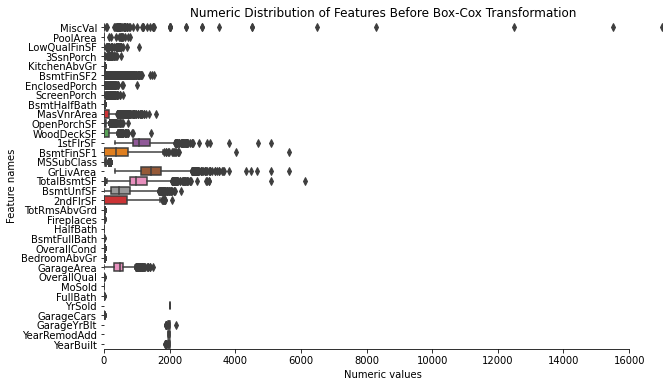

In [ ]:
skewnewss_index = list(skewness_features.index)
skewnewss_index.remove('LotArea')
all_numeric_df = all_df.loc[:, skewnewss_index]

fig, ax = plt.subplots(figsize=(10, 6))
ax = code
ax.set_xlim(0, all_numeric_df.max().sort_values(ascending=False)[0])
ax.xaxis.grid(False)
ax.set(ylabel="Feature names")
ax.set(xlabel="Numeric values")
ax.set(title="Numeric Distribution of Features Before Box-Cox Transformation")
sns.despine(trim=True, left=True)

- 이번에는 왜도가 1보다 크면 모두 변환하는 코드를 작성했다. 
- 이 때 박스콕스 변환을 시도한다. 
  + Box-Cox 변환은 정규 분포와 매우 유사하도록 데이터를 변환하는 것이다. 
  + 비대칭 데이터를 정규화할 때 사용한다. 

In [ ]:
from scipy.special import code
from scipy.stats import code

# 왜도가 1보다 높은 수치형 변수를 출력하는 코드
high_skew = code
high_skew_index = high_skew.index

print("The data before Box-Cox Transformation: \n", all_df[high_skew_index].head())

# boxcox를 변환하는 코드
for num_var in high_skew_index:
  all_df[num_var] = code(all_df[num_var], code(all_df[num_var] + 1))

print("The data after Box-Cox Transformation: \n", all_df[high_skew_index].head())

The data before Box-Cox Transformation: 
    MiscVal  PoolArea  LotArea  LowQualFinSF  3SsnPorch  KitchenAbvGr  \
0        0         0     8450             0          0             1   
1        0         0     9600             0          0             1   
2        0         0    11250             0          0             1   
3        0         0     9550             0          0             1   
4        0         0    14260             0          0             1   

   BsmtFinSF2  EnclosedPorch  ScreenPorch  BsmtHalfBath  MasVnrArea  \
0         0.0              0            0           0.0       196.0   
1         0.0              0            0           1.0         0.0   
2         0.0              0            0           0.0       162.0   
3         0.0            272            0           0.0         0.0   
4         0.0              0            0           0.0       350.0   

   OpenPorchSF  WoodDeckSF  1stFlrSF  BsmtFinSF1  MSSubClass  GrLivArea  \
0           61         

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/scipy/stats/stats.py:3943: PearsonRNearConstantInputWarning: An input array is nearly constant; the computed correlation coefficent may be inaccurate.
  warnings.warn(PearsonRNearConstantInputWarning())


The data after Box-Cox Transformation: 
    MiscVal  PoolArea    LotArea  LowQualFinSF  3SsnPorch  KitchenAbvGr  \
0      0.0       0.0  13.441163           0.0        0.0      0.751165   
1      0.0       0.0  13.711770           0.0        0.0      0.751165   
2      0.0       0.0  14.052144           0.0        0.0      0.751165   
3      0.0       0.0  13.700639           0.0        0.0      0.751165   
4      0.0       0.0  14.569343           0.0        0.0      0.751165   

   BsmtFinSF2  EnclosedPorch  ScreenPorch  BsmtHalfBath  MasVnrArea  \
0         0.0       0.000000          0.0      0.000000   19.403767   
1         0.0       0.000000          0.0      0.711023    0.000000   
2         0.0       0.000000          0.0      0.000000   17.743119   
3         0.0      15.916957          0.0      0.000000    0.000000   
4         0.0       0.000000          0.0      0.000000   25.360527   

   OpenPorchSF  WoodDeckSF  1stFlrSF  BsmtFinSF1  MSSubClass  GrLivArea  \
0    12.0003

- 이제 시각화를 작성한다. 

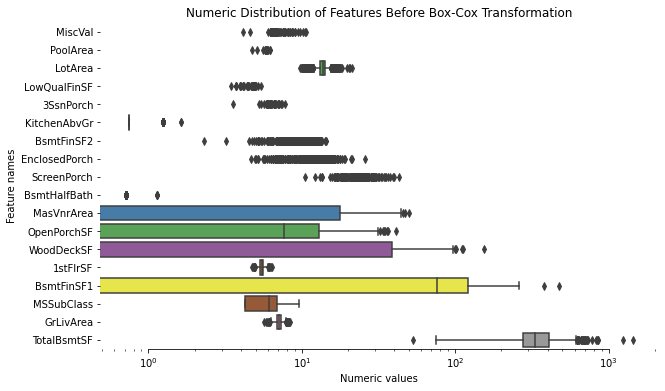

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_xscale('log')
code
ax.xaxis.grid(False)
ax.set(ylabel="Feature names")
ax.set(xlabel="Numeric values")
ax.set(title="Numeric Distribution of Features Before Box-Cox Transformation")
sns.despine(trim=True, left=True)

- 이 상황에서 조금 더 그래프를 그리기 위해서는 각 변수마다 그래프를 그리는 것이 좋다. 
- high_skew_index[0]에서 숫자를 바꿔보도록 한다. 
  + `0`에 수렴하는 데이터가 많다는 것은 그만큼 이상치가 많다는 뜻이기도 하다. 
  + 평균에서 크게 벗어난 데이터가 많다는 뜻이므로 실무에서는 보다 정밀한 처리가 필요하다. 


The value of mu before log transformation is: 0.2495673188339734
The value of sigma before log transformation is: 1.3188233766648123


<ipython-input-22-572d5a7bfc77>:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


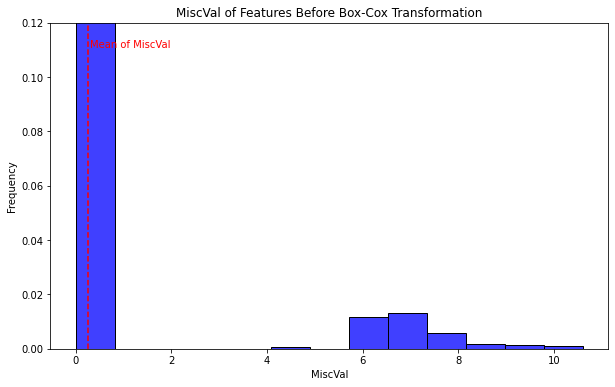

In [ ]:
import numpy as np 

(mu, sigma) = norm.fit(all_df[high_skew_index[0]])
print("The value of mu before log transformation is:", mu)
print("The value of sigma before log transformation is:", sigma)

code

plt.axvline(mu, color='r', linestyle='--')
plt.text(mu + 0.05, 0.111, 'Mean of ' + high_skew_index[0], rotation=0, color='r')
plt.ylim(0, 0.12)
fig.show()

- 자주 사용하게 될 것 같으니, 그래프 함수를 하나 만들어서 사용하는 것이 좋다. 
  + 이 부분들은 독자분들에게 맡긴다. 
  + 참조: https://jehyunlee.github.io/2021/05/18/Python-DS-73-mplfunc/


### 도출 변수
- 각 층의 면적을 모두 더해 전체 면적으로 계산한 새로운 변수를 작성한다. 


In [ ]:
all_df['TotalSF'] = all_df['TotalBsmtSF'] + all_df['1stFlrSF'] + all_df['2ndFlrSF']
all_df = all_df.drop(['TotalBsmtSF', '1stFlrSF', '2ndFlrSF'], axis=1)
print(all_df.shape)

(2914, 71)


- 마찬가지로 Bathroom과 porch와 관련한 변수들도 동일한 방식으로 도출 한다. 
- 그리고 그 외 변수들은 제거한다. 


In [ ]:
all_df['Total_Bathrooms'] = (all_df['FullBath'] + (0.5 * all_df['HalfBath']) + all_df['BsmtFullBath'] + (0.5 * all_df['BsmtHalfBath']))
all_df['Total_porch_sf'] = (all_df['OpenPorchSF'] + all_df['3SsnPorch'] + all_df['EnclosedPorch'] + all_df['ScreenPorch'])
all_df = all_df.drop(['FullBath', 'HalfBath', 'BsmtFullBath', 'BsmtHalfBath', 'OpenPorchSF', '3SsnPorch', 'EnclosedPorch', 'ScreenPorch'], axis=1)
print(all_df.shape)

(2914, 65)


- 이번에는 연도와 관련된 변수를 추출하는 코드를 작성한다. 
- 조건문을 통해 문자에 `Yr` 또는 `Year`이 있다면 추가하는 방식을 사용했다. 

In [ ]:
num_all_vars = list(train.select_dtypes(include=[np.number]))
year_feature = []
for var in num_all_vars:
  if 'Yr' in var:
    year_feature.append(var)
  elif 'Year' in var:
    year_feature.append(var)
  else:  
    print(var, "is not related with Year")
print(year_feature)

MSSubClass is not related with Year
LotFrontage is not related with Year
LotArea is not related with Year
OverallQual is not related with Year
OverallCond is not related with Year
MasVnrArea is not related with Year
BsmtFinSF1 is not related with Year
BsmtFinSF2 is not related with Year
BsmtUnfSF is not related with Year
TotalBsmtSF is not related with Year
1stFlrSF is not related with Year
2ndFlrSF is not related with Year
LowQualFinSF is not related with Year
GrLivArea is not related with Year
BsmtFullBath is not related with Year
BsmtHalfBath is not related with Year
FullBath is not related with Year
HalfBath is not related with Year
BedroomAbvGr is not related with Year
KitchenAbvGr is not related with Year
TotRmsAbvGrd is not related with Year
Fireplaces is not related with Year
GarageCars is not related with Year
GarageArea is not related with Year
WoodDeckSF is not related with Year
OpenPorchSF is not related with Year
EnclosedPorch is not related with Year
3SsnPorch is not rela

- YrSold를 제외한 다른 3개의 변수 시각화를 진행한다. 

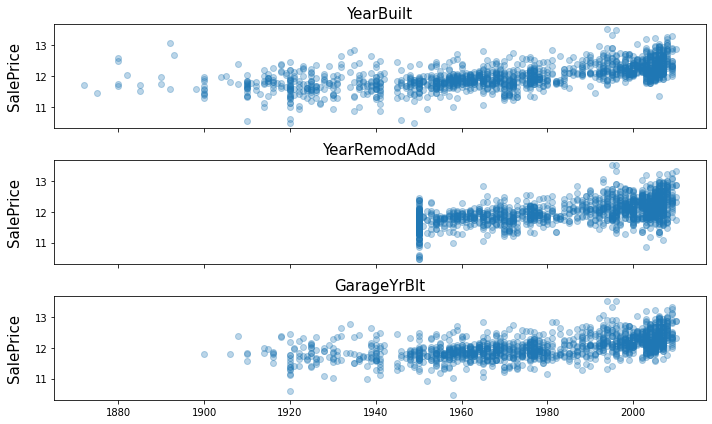

In [ ]:
fig, ax = plt.subplots(3, 1, figsize=(10, 6), sharex=True, sharey=True)
for i, var in enumerate(year_feature):
  if var != 'YrSold':
    ax[i].scatter(train[var], y, alpha=0.3)
    ax[i].set_title('{}'.format(var), size=15)
    ax[i].set_ylabel('SalePrice', size=15, labelpad=12.5)
plt.tight_layout()
plt.show()

- 그림에서 보는 가장 최근 연도에 근접할 수록 산점도는 우상향을 나타나고 있는 것을 확인할 수 있다. 

In [ ]:
all_df = all_df.drop(['YearBuilt', 'GarageYrBlt'], axis=1)
print(all_df.shape)

(2914, 63)


- 판매시기를 기적으로 건축일, 리모델링, 차고 건축일 등의 기간을 구하였다. 
- 이렇게 구한 뒤, 다시 산점도를 작성하면, 데이터의 경향이 조금 달라진 걸 확인할 수 있다. 
- 즉, 리모델링를 예로들면, 통상적으로 리모델링이 최근에 이뤄질수록 값을 높게 받는 경향이 있다. 이러한 경향성이 나타나는 것을 의미한다. 

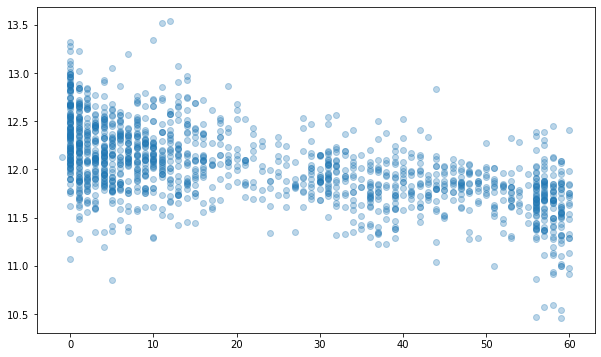

In [ ]:
YearsSinceRemodel = train['YrSold'].astype(int) - train['YearRemodAdd'].astype(int)

fig, ax = plt.subplots(figsize=(10, 6))

# code
code
plt.show()

- 이러한 부분을 이용하여 데이터 새로운 도출 변수를 생성 후, 기존 데이터는 삭제 했다. 

In [ ]:
all_df['YearsSinceRemodel'] = all_df['YrSold'].astype(int) - all_df['YearRemodAdd'].astype(int)
all_df = all_df.drop(['YrSold', 'YearRemodAdd'], axis=1)
print(all_df.shape)

(2914, 62)


### 더미 변수
- 더미변수란 독립변수를 0과1로 변환한 변수를 말한다. 
- 아래 데이터를 보면, 0의 데이터는 압도적으로 많고, 그 외의 데이터에서는 각 1개씩만 존재하는 것을 확인할 수 있다. 
- 이러한 수치들은 일괄적으로 1로 대치하여 조정하였다.  

In [ ]:
all_df['PoolArea'].value_counts()

0.000000    2901
5.719656       1
5.924217       1
5.856262       1
5.947237       1
5.554803       1
6.162866       1
5.844393       1
5.787942       1
4.722720       1
5.131878       1
6.232823       1
6.049844       1
5.914833       1
Name: PoolArea, dtype: int64

- 더미 feature를 만들기 위한 함수를 작성한다. 
    + 0보다 작으면 0로 변환하고,
    + 그 외에는 1로 변환한다. 

In [ ]:
def count_dummy(x):
  code

In [ ]:
all_df['PoolArea'] = all_df['PoolArea'].apply(code)
all_df['PoolArea'].value_counts()

0    2901
1      13
Name: PoolArea, dtype: int64

In [ ]:
all_df['GarageArea'] = all_df['GarageArea'].apply(code)
all_df['GarageArea'].value_counts()

1    2757
0     157
Name: GarageArea, dtype: int64

In [ ]:
all_df['Fireplaces'] = all_df['Fireplaces'].apply(code)
all_df['Fireplaces'].value_counts()

1    1498
0    1416
Name: Fireplaces, dtype: int64

### Label Encoding, Ordinal Encoding, One-Hot Encoding
- 인코딩은 문자 데이터를 수치로 변환하는 방법론 중의 하나이다.
- Label Encoding과 Ordinal Encoding은 데이터를 일괄적으로 가-하, A-Z순으로 일괄적으로 0번째부터 바꿔준다. 
- 반면에, One-Hot Encoding은 값의 크기에 상관없이 0과 1로 바꿔준다.


In [ ]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

temp = pd.DataFrame({'Food_Name': ['Apple', 'Chicken', 'Broccoli'], 
                     'Calories': [95, 231, 50]})

# code
code

['Apple', 'Chicken', 'Broccoli'] ==> [0 2 1]


In [ ]:
from sklearn.preprocessing import OrdinalEncoder
import pandas as pd

temp = pd.DataFrame({'Food_Name': ['Apple', 'Chicken', 'Broccoli'], 
                     'Calories': [95, 231, 50]})

# code
code

['Apple', 'Chicken', 'Broccoli'] ==> [[0.0], [2.0], [1.0]]


- 이번에는 pandas를 통해 직접 숫자를 지정하는 코드를 작성해본다. 

In [ ]:
import pandas as pd
temp = pd.DataFrame({'Food_Name': ['Apple', 'Chicken', 'Broccoli'], 
                     'Calories': [95, 231, 50]})

# code
code

  Food_Name  Food_No
0     Apple        1
1   Chicken        2
2  Broccoli        3


- 이번에는 One-Hot Encoding을 진행한다. 
- sklearn 방식을 통해서도 가능하지만 조금 번거롭다. 따라서, 특별한 경우가 아니면, pandas의 get_dummies() 함수를 사용한다. 

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelBinarizer

temp = pd.DataFrame({'Food_Name': ['Apple', 'Chicken', 'Broccoli'], 
                     'Calories': [95, 231, 50]})

# code
code

   Calories  Food_Name_Apple  Food_Name_Broccoli  Food_Name_Chicken
0        95                1                   0                  0
1       231                0                   0                  1
2        50                0                   1                  0
(3, 4)


In [ ]:
import pandas as pd

temp = pd.DataFrame({'Food_Name': ['Apple', 'Chicken', 'Broccoli'], 
                     'Calories': [95, 231, 50]})

temp = pd.get_dummies(temp)
print(temp)
print(temp.shape)

   Calories  Food_Name_Apple  Food_Name_Broccoli  Food_Name_Chicken
0        95                1                   0                  0
1       231                0                   0                  1
2        50                0                   1                  0
(3, 4)


In [ ]:
all_df = pd.code(all_df).reset_index(drop=True)
all_df.shape

(2914, 258)

## 머신러닝 모형 학습 및 평가

#### 데이터셋 분리 및 교차 검증
- 어느정도의 전처리가 끝이 났다면, 이제 머신러닝 모형을 위한 준비에 들어간다. 
- train과, test데이터를 분리한 후, X_test 데이터만 가져온다. 

In [ ]:
X = all_df.iloc[:len(y), :]
test = all_df.iloc[len(y):, :]
X.shape, y.shape, test.shape

((1455, 258), (1455,), (1459, 258))

- 이번에는 train과 검증 데이터로 분리한다. 

In [ ]:
from sklearn.model_selection import code

# code
X_train, X_test, y_train, y_test = code(X, y, test_size = 0.25, random_state = 0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1091, 258), (364, 258), (1091,), (364,))

### 평가지표


#### MAE
- 실제값과 예측값의 차이인 오차들의 절대값 평균을 말함
- MSE보다는 특이치에 덜 민감하다. 
- 오차페 절대값이 씌우기 때문에 실제 값에 대해 underestimates or overestimates 인지 파악하기 어려움

In [1]:
import numpy as np

def mean_absolute_error(y_true, y_pred):

  error = 0
  for yt, yp in zip(y_true, y_pred):
    error = error + np.abs(yt-yp)
  
  mae = error / len(y_true)
  return mae

#### MSE
- 예측값과 실제값의 차이인 오차들의 제곱 평균으로 정의하며
- 제곱을 하게 될 경우, 이상치에 민감하다. 
    + 예를 들면, 1 미만의 에러는 더 작아지고, 그 이상의 에러는 더 커지는 경향이 있다. 
    

In [2]:
import numpy as np

def mean_squared_error(y_true, y_pred):

  error = 0
  for yt, yp in zip(y_true, y_pred):
    error = error + (yt - yp) ** 2
  
  mse = error / len(y_true)
  return mse

#### RMSE
- 오차를 제곱하기 때문에, 이상치에 민감하지만 제곱된 오차를 다시 루트로 풀어주기 때문에 값의 왜곡이 MSE에 비해 좀 덜하다. 

In [3]:
import numpy as np

def root_rmse_squared_error(y_true, ypred):
  error = 0
  
  for yt, yp in zip(y_true, y_pred):
    error = error + (yt - yp) ** 2
  
  mse = error / len(y_true)
  rmse = np.round(np.sqrt(mse), 3)
  return rmse

#### Test1

In [7]:
y_true = [400, 300, 800]
y_pred = [380, 320, 777]

print("MAE:", mean_absolute_error(y_true, y_pred))
print("MSE:", mean_squared_error(y_true, y_pred))
print("RMSE:", root_rmse_squared_error(y_true, y_pred))

MAE: 213.33333333333334
MSE: 120266.66666666667
RMSE: 346.795


#### Test2

In [ ]:
y_true = [400, 300, 800, 900]
y_pred = [380, 320, 777, 600]

print("MAE:", mean_absolute_error(y_true, y_pred))
print("MSE:", mean_squared_error(y_true, y_pred))
print("RMSE:", root_rmse_squared_error(y_true, y_pred))

MAE: 90.75
MSE: 22832.25
RMSE: 151.103


#### RMSE with Sklean
- RMSE 관련 함수는 존재하지 않아서, 추가로 만들었다. (사용은 하지 않음)

In [ ]:
from sklearn.metrics import code

def rmse(y_true, y_pred):
    # code
    return np.sqrt(code(y_true, y_pred))

### 모형 정의 및 검증 평가
- 모의고사 없이 바로 테스트를 할 수 없다. 
- 간단한 비유를 들자면, 
    + 훈련(Train) 데이터: 문제은행의 다양한 문제 유형
    + 검증(Validation) 데이터: 실전 모의 고사
    + 시험(Test) 데이터: 수능 문제
- 또한, 훈련 데이터에만 과몰입하여 반복한다면, 수능 문제 유형에 대비하기 어려움
- 모의 고사를 많이 보면 볼 수록 실전 문제에 대비할 수 있음 
- cv_rmse 함수
    + KFold는 총 검증을 몇번 진행할 것인지 정하여 학습 진행
    + -cross_val_score는 모형의 평가 지표를 산출하는 함수이다. 
        - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression

def cv_rmse(model, n_folds=5):
    cv = code(n_splits=n_folds, random_state=42, shuffle=True)
    
    # code 
    rmse_list = np.sqrt(-cross_val_score(model, X, y, scoring='code', cv=cv)) # rmse
    print('CV RMSE value list:', np.round(rmse_list, 4))
    print('CV RMSE mean value:', np.round(np.mean(rmse_list), 4))
    return (rmse_list)

n_folds = 5
rmse_scores = {}
lr_model = LinearRegression()

- 각 검증 데이터를 평가한 평가지표의 평균값을 구한다. 
- 먼저 선형 회귀의 지표를 확인한다. 

In [ ]:
score = cv_rmse(lr_model, n_folds)
print("linear regression - mean: {:.4f} (std: {:.4f})".format(score.mean(), score.std()))
rmse_scores['linear regression'] = (score.mean(), score.std())

CV RMSE value list: [0.1157 0.1109 0.1334 0.1453 0.1829]
CV RMSE mean value: 0.1376
linear regression - mean: 0.1376 (std: 0.0258)


### 첫번째 최종 예측 값 제출
- 이제 마지막 테스트 데이터를 활용하여 예측을 진행한다. 
- 이 때, np.expm1()함수는 로그값으로 변환한 걸 다시 변환해주는 함수이다. 
    + SalePrice를 사전에 로그 변환을 진행했었다. 
- 정상적으로 가격이 나타나는 것을 확인할 수 있다. 

In [ ]:
from sklearn.model_selection import code

X = all_df.iloc[:len(y), :]
X_test = all_df.iloc[len(y):, :]
X.shape, y.shape, X_test.shape

lr_model_fit = lr_model.fit(X, y)

# code 
final_preds = code
print(final_preds)

[117040. 158151. 187395. ... 173242. 115478. 220353.]


- 이제 제출 코드를 작성한다.

In [ ]:
submission = pd.read_csv("sample_submission.csv")
submission.iloc[:,1] = final_preds
print(submission.head())
submission.to_csv("The_first_regression.csv", index=False)

     Id  SalePrice
0  1461   117040.0
1  1462   158151.0
2  1463   187395.0
3  1464   197364.0
4  1465   200040.0


- 제출은 csv 파일에서 다운로드 받아 진행한다. 

### 모형 알고리즘 추가
- 모형 알고리즘에 대한 설명은 생략합니다. 
- 각각의 모형을 불러온 후, 기존에 정의된 cv_rmse 함수에 적용을 합니다. 
    + 그리고, 각각의 스코어 점수를 리스트에 담습니다. 

In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

# LinearRegresison
lr_model = LinearRegression()

# Tree Decision 
tree_model = DecisionTreeRegressor()

# Random Forest Regressor
rf_model = RandomForestRegressor()

# Gradient Boosting Regressor
gbr_model = GradientBoostingRegressor()

In [ ]:
score = cv_rmse(lr_model, n_folds)
print("linear regression - mean: {:.4f} (std: {:.4f})".format(score.mean(), score.std()))
rmse_scores['linear regression'] = (score.mean(), score.std())

CV RMSE value list: [0.1157 0.1109 0.1334 0.1453 0.1829]
CV RMSE mean value: 0.1376
linear regression - mean: 0.1376 (std: 0.0258)


In [ ]:
score = cv_rmse(tree_model, n_folds)
print("Decision Tree Regressor - mean: {:.4f} (std: {:.4f})".format(score.mean(), score.std()))
rmse_scores['Decision Tree Regressor'] = (score.mean(), score.std())

CV RMSE value list: [0.1976 0.2216 0.2308 0.2132 0.2441]
CV RMSE mean value: 0.2215
Decision Tree Regressor - mean: 0.2215 (std: 0.0158)


In [ ]:
score = cv_rmse(rf_model, n_folds)
print("RandomForest Regressor - mean: {:.4f} (std: {:.4f})".format(score.mean(), score.std()))
rmse_scores['RandomForest Regressor'] = (score.mean(), score.std())

CV RMSE value list: [0.1234 0.134  0.1455 0.1423 0.1819]
CV RMSE mean value: 0.1454
RandomForest Regressor - mean: 0.1454 (std: 0.0198)


In [ ]:
score = cv_rmse(gbr_model, n_folds)
print("Gradient Boosting Regressor - mean: {:.4f} (std: {:.4f})".format(score.mean(), score.std()))
rmse_scores['Gradient Boosting Regressor'] = (score.mean(), score.std())

CV RMSE value list: [0.1139 0.1243 0.1285 0.123  0.1769]
CV RMSE mean value: 0.1333
Gradient Boosting Regressor - mean: 0.1333 (std: 0.0223)


- 이제, 각각의 리스트를 비교하는 그래프를 작성합니다. 
- 그래프를 비교하여, 어떤 모형을 선택할지 그래프를 통해 직관적으로 확인할 수 있다. 

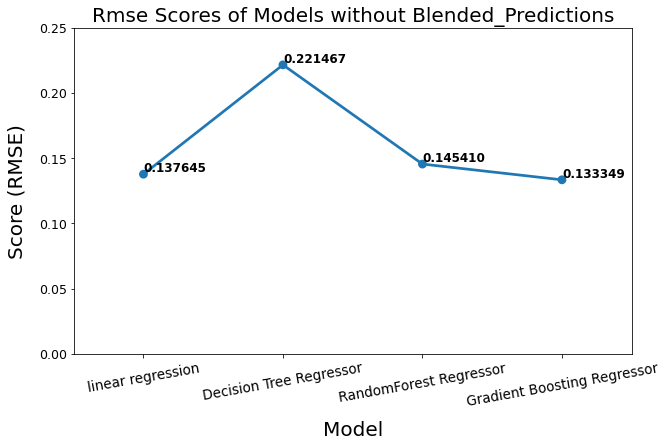

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

ax = sns.pointplot(x=list(rmse_scores.keys()), y=[score for score, _ in rmse_scores.values()], markers=['o'], linestyles=['-'], ax=ax)
for i, score in enumerate(rmse_scores.values()):
    ax.text(i, score[0] + 0.002, '{:.6f}'.format(score[0]), horizontalalignment='left', size='large', color='black', weight='semibold')

ax.set_ylabel('Score (RMSE)', size=20, labelpad=12.5)
ax.set_xlabel('Model', size=20, labelpad=12.5)
ax.tick_params(axis='x', labelsize=13.5, rotation=10)
ax.tick_params(axis='y', labelsize=12.5)
ax.set_ylim(0, 0.25)
ax.set_title('Rmse Scores of Models without Blended_Predictions', size=20)

plt.show()

- blended_learning은 여러 종류의 모형을 버리지 않고, 순수하게 성능 평가 개선을 위해 도입된 개념이다. 

In [ ]:
lr_model_fit = lr_model.fit(X, y)
tree_model_fit = tree_model.fit(X, y)
rf_model_fit = rf_model.fit(X, y)
gbr_model_fit = gbr_model.fit(X, y)

def blended_learning_predictions(X): 
  blended_score = (0.3 * lr_model_fit.predict(X)) + \
  (0.1 * tree_model_fit.predict(X)) + \
  (0.3 * gbr_model_fit.predict(X)) + \
  (0.3 * rf_model_fit.predict(X))
  return blended_score

- 기존 수치보다 상대적으로 성능이 더 좋아보인 것처럼 보인다. 

In [ ]:
blended_score = rmsle(y, blended_learning_predictions(X))
rmse_scores['blended'] = (blended_score, 0)
print('RMSLE score on train data:')
print(blended_score)

RMSLE score on train data:
0.06275869710151817


<ipython-input-75-4f6a4d82aa2a>:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


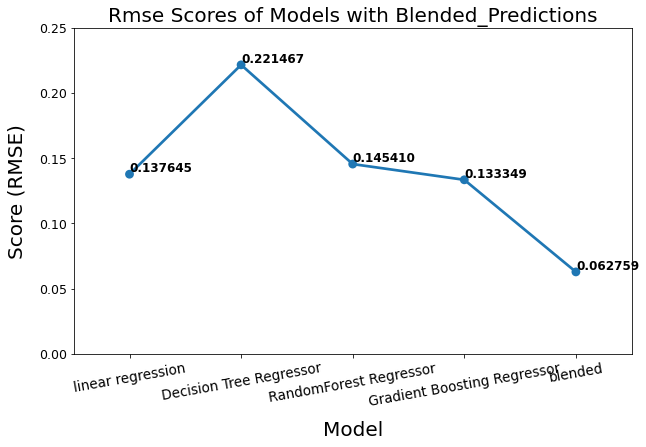

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

ax = sns.pointplot(x=list(rmse_scores.keys()), y=[score for score, _ in rmse_scores.values()], markers=['o'], linestyles=['-'], ax=ax)
for i, score in enumerate(rmse_scores.values()):
    ax.text(i, score[0] + 0.002, '{:.6f}'.format(score[0]), horizontalalignment='left', size='large', color='black', weight='semibold')

ax.set_ylabel('Score (RMSE)', size=20, labelpad=12.5)
ax.set_xlabel('Model', size=20, labelpad=12.5)
ax.tick_params(axis='x', labelsize=13.5, rotation=10)
ax.tick_params(axis='y', labelsize=12.5)
ax.set_ylim(0, 0.25)

ax.set_title('Rmse Scores of Models with Blended_Predictions', size=20)

plt.show()

In [ ]:
submission.iloc[:,1] = np.floor(np.expm1(blended_learning_predictions(X_test)))
submission.to_csv("The_second_regression.csv", index=False)

- 위 코드는 일종의 샘플 코드라고 볼 수 있다. 
- 처음 입문자들이 전반적인 흐름을 이해하는 데 충분히 큰 도움이 되었으리라 생각을 한다. 
- 모형의 성능을 올리기 위해서는 데이터 전처리 + 모형의 학습 이 단계를 계속해서 반복해야 하며, 중간중간 확인하는 차원에서 시각화를 적절히 추가한다. 
- 앞으로 남은 3개의 대회의 흐름도 이와 유사하게 흘러간다. 
    + 그러나, 각 단계마다 조금씩 난이도를 높였으니, 계속 정진하기를 바란다. 